# Impact of Area, Bedroom Size, and Age of Home on Price

In [178]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [263]:
df = pd.read_excel(r"C:\Users\sabah computer\Documents\multipleLR.xlsx");
print(df.head())

     area  bedroom   age     price
0  4174.0      NaN   NaN  630598.0
1  4507.0      4.0   1.0       NaN
2  1860.0      NaN   NaN  310734.0
3  2294.0      4.0  26.0  369105.0
4  2130.0      3.0  22.0  338158.0


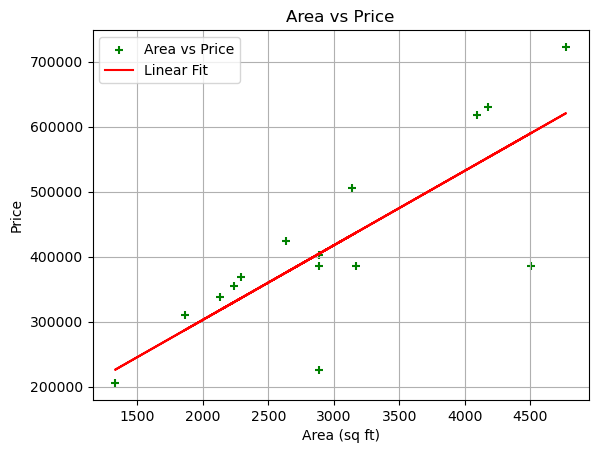

In [271]:

df['area'] = df['area'].fillna(df['area'].median())
df['price'] = df['price'].fillna(df['price'].median())

plt.scatter(df['area'], df['price'], color='green', marker="+", label='Area vs Price')

m, b = np.polyfit(df['area'], df['price'], 1)

plt.plot(df['area'], m * df['area'] + b, color='red', label='Linear Fit')

plt.title("Area vs Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

In [182]:
a= print("Median of area: ",df['area'].median())

Median of area:  2886.5


In [97]:
b = print("Median of bedroom: ",df['bedroom'].median())

Median of bedroom:  3.5


In [99]:
import math
print("Again median of bedroom with another way: ", df.bedroom.median())

Again median of bedroom with another way:  3.5


In [101]:
ag = print("Median of Age: ",df['age'].median())

Median of Age:  23.5


In [103]:
p = print("Median of Price: ",df['price'].median())

Median of Price:  385598.5


In [237]:
print(df.head())

     area  bedroom   age     price
0  4174.0      3.5  23.5  630598.0
1  4507.0      4.0   1.0  385598.5
2  1860.0      3.5  23.5  310734.0
3  2294.0      4.0  26.0  369105.0
4  2130.0      3.0  22.0  338158.0


# Data Mining

In [186]:
df['area'] = df['area'].fillna(df['area'].median())
df['bedroom'] = df['bedroom'].fillna(df['bedroom'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['price'] = df['price'].fillna(df['price'].median())
print(df.head())

     area  bedroom   age     price
0  4174.0      3.5  23.5  630598.0
1  4507.0      4.0   1.0  385598.5
2  1860.0      3.5  23.5  310734.0
3  2294.0      4.0  26.0  369105.0
4  2130.0      3.0  22.0  338158.0


In [188]:
model = linear_model.LinearRegression()
model.fit(df.drop('price', axis='columns'), df.price)

LinearRegression()

# Predicting

In [195]:
# Create a DataFrame for the input with the correct feature names
input_data = pd.DataFrame([[4174, 3.5, 23.5]], columns=['area', 'bedroom', 'age'])

# Predict using the model
prediction = model.predict(input_data)
print(prediction)


[566168.67440414]


In [203]:
input_data = pd.DataFrame([[3000, 3, 20]], columns=['area', 'bedroom', 'age'])
prediction = model.predict(input_data)
print(prediction)

[416452.95990786]


# Split Data (80% training, 20% testing)

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop('price', axis=1)
y = df['price']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the linear regression model

In [216]:
# md = model
md = linear_model.LinearRegression()
md.fit(X_train, y_train)

LinearRegression()

### Predictions on the test set

In [221]:
y_pred = md.predict(X_test)

In [227]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.616585998842953
